In [40]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [41]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [42]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [43]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
#     e = y - np.dot(tx, w)
#     e = e.reshape(-1, 1)
    
#     return np.dot(e.T, e).flatten()[0] / (2 * e.shape[0])
    e = np.abs(y - np.dot(tx, w))
    
    return np.mean(e)
    

mock_y = np.array([1,1])
mock_x = np.array([[1,1], [1,2]])
mock_w = np.array([1, 2])
print(compute_loss(mock_y, mock_x, mock_w))

3.0


# 2 Grid Search

Fill in the function `grid_search()` below:

In [44]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, v0 in enumerate(w0):
        for j, v1 in enumerate(w1):
            w = np.array([v0, v1])
            losses[i, j] = compute_loss(y, tx, w)
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.5885150157040915, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.015 seconds


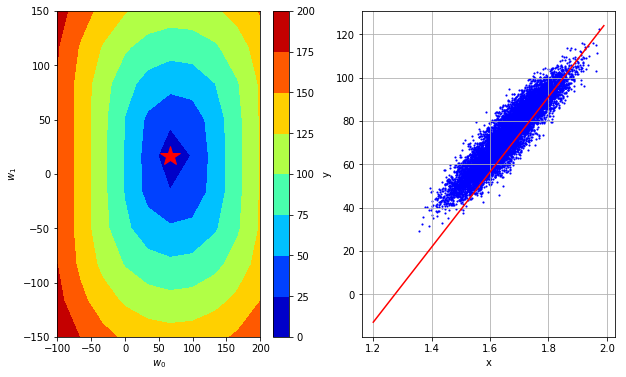

In [45]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [88]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
#     e = y - np.dot(tx, w)
    
#     return -np.dot(tx.T, e) / e.shape[0]
    e = y - np.dot(tx, w)
    tx = tx[e != 0]
    e = e[e != 0]
    if e.shape[0] < y.shape[0]:
        print("Found non-differentiable point(s)")
    signs = -e / np.abs(e)
    signs_mat = np.zeros_like(tx)
    for i in range(signs_mat.shape[1]):
        signs_mat[:, i] = signs
    
    return np.sum(tx * signs_mat, axis=0) / y.shape[0]

mock_y = np.array([1,1])
mock_x = np.array([[1,1], [1,2]])
mock_w = np.array([1, 2])
print(compute_gradient(mock_y, mock_x, mock_w))

[1.  1.5]


Please fill in the functions `gradient_descent` below:

In [89]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [98]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 70
gamma = 2

# Initialization
w_initial = np.array([0, 0], dtype=np.float64)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/69): loss=73.29392200210518, w0=2.0, w1=-4.437072931295916e-15
Gradient Descent(1/69): loss=71.29392200210518, w0=4.0, w1=-8.874145862591832e-15
Gradient Descent(2/69): loss=69.29392200210518, w0=6.0, w1=-1.3311218793887748e-14
Gradient Descent(3/69): loss=67.29392200210518, w0=8.0, w1=-1.7748291725183663e-14
Gradient Descent(4/69): loss=65.29392200210518, w0=10.0, w1=-2.218536465647958e-14
Gradient Descent(5/69): loss=63.29392200210517, w0=12.0, w1=-2.6622437587775494e-14
Gradient Descent(6/69): loss=61.29392200210517, w0=14.0, w1=-3.105951051907141e-14
Gradient Descent(7/69): loss=59.29392200210517, w0=16.0, w1=-3.5496583450367327e-14
Gradient Descent(8/69): loss=57.29392200210517, w0=18.0, w1=-3.993365638166324e-14
Gradient Descent(9/69): loss=55.29392200210517, w0=20.0, w1=-4.437072931295916e-14
Gradient Descent(10/69): loss=53.29392200210517, w0=22.0, w1=-4.880780224425507e-14
Gradient Descent(11/69): loss=51.293922002105184, w0=24.0, w1=-5.324487517555099e-14
G

In [99]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=71, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [111]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter = 0
    for batch_y, batch_tx in batch_iter(y, tx, batch_size, max_iters):
        loss = compute_loss(batch_y, batch_tx, w)
        grad = compute_gradient(batch_y, batch_tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        n_iter += 1
    
    return losses, ws

In [112]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 1
gamma = 0.7
batch_size = 64

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/149): loss=74.7322623682376, w0=0.7, w1=0.013292597827132104
SGD(1/149): loss=70.37805312231987, w0=1.4, w1=-0.13992202992227365
SGD(2/149): loss=71.8572701688791, w0=2.0999999999999996, w1=-0.17982326578361643
SGD(3/149): loss=74.63438010882078, w0=2.8, w1=-0.02322556443467161
SGD(4/149): loss=73.65456955431759, w0=3.5, w1=0.13630680945577586
SGD(5/149): loss=70.05364401834575, w0=4.2, w1=0.1915446407733366
SGD(6/149): loss=69.24506114717187, w0=4.9, w1=0.26360861653971723
SGD(7/149): loss=68.40031180839159, w0=5.6000000000000005, w1=0.28026102436906736
SGD(8/149): loss=67.26865027930955, w0=6.300000000000001, w1=0.27334370147393083
SGD(9/149): loss=66.63757336912657, w0=7.000000000000001, w1=0.20808441413764703
SGD(10/149): loss=67.90055400668284, w0=7.700000000000001, w1=0.3199424750675723
SGD(11/149): loss=64.48863409018155, w0=8.4, w1=0.29072036704539655
SGD(12/149): loss=64.20672928604063, w0=9.1, w1=0.2537452769906791
SGD(13/149): loss=65.44020849934037, w0=9.7999999999999

In [113]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=71, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

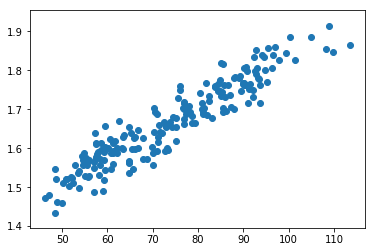

In [29]:
height, weight, gender = load_data(sub_sample=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
_ = plt.scatter(weight, height)

In [30]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0], dtype=np.float64)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.272224438416, w0=51.542590721811784, w1=10.132993413506092
Gradient Descent(1/49): loss=267.0500258779424, w0=67.00536793835532, w1=13.17289143755783
Gradient Descent(2/49): loss=36.45002800750035, w0=71.64420110331838, w1=14.084860844773326
Gradient Descent(3/49): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=13.644931152102245, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=13.643446931881352, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=13.64343490969756, w0=73.63214202236942, w1=1

In [31]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Gradient Descent(0/49): loss=2814.5741265369106, w0=51.391509752712835, w1=5.970589454392503
Gradient Descent(1/49): loss=329.034285804834, w0=66.8089626785267, w1=7.761766290710222
Gradient Descent(2/49): loss=105.33570013894685, w0=71.43419855627086, w1=8.299119341605527
Gradient Descent(3/49): loss=85.20282742901702, w0=72.82176931959411, w1=8.460325256874116
Gradient Descent(4/49): loss=83.3908688851233, w0=73.23804054859109, w1=8.508687031454691
Gradient Descent(5/49): loss=83.22779261617289, w0=73.36292191729018, w1=8.523195563828864
Gradient Descent(6/49): loss=83.21311575196734, w0=73.4003863278999, w1=8.527548123541116
Gradient Descent(7/49): loss=83.21179483418885, w0=73.41162565108282, w1=8.528853891454792
Gradient Descent(8/49): loss=83.21167595158879, w0=73.4149974480377, w1=8.529245621828895
Gradient Descent(9/49): loss=83.21166525215477, w0=73.41600898712416, w1=8.529363140941125
Gradient Descent(10/49): loss=83.2116642892057, w0=73.41631244885009, w1=8.529398396674795
G

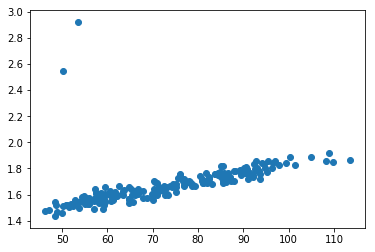

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [33]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
_ = plt.scatter(weight, height)

# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0], dtype=np.float64)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)